In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Price        0
Principal    0
dtype: int64


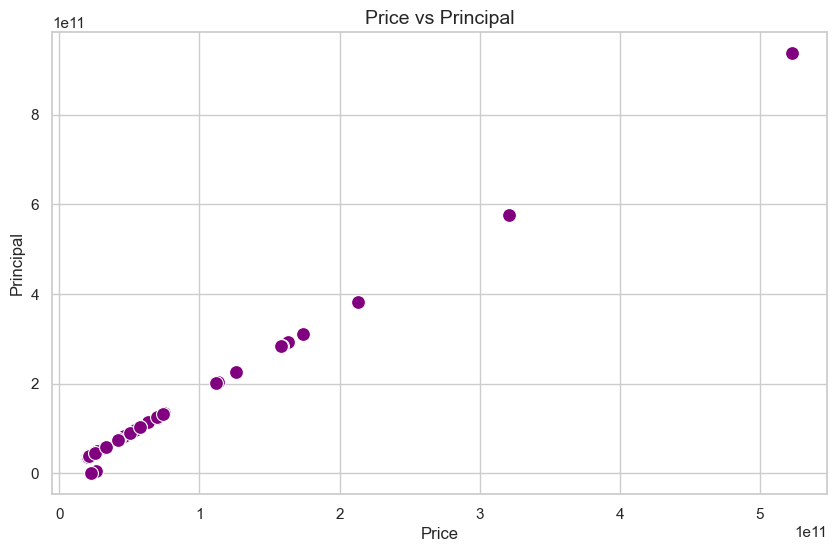

In [151]:
# Load and validate data
data = pd.read_excel("Fund.xlsx", engine="openpyxl")
# Inspect data
print(data[["Price", "Principal"]].isnull().sum())
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["Price"], y=data["Principal"], color="purple", s=100)
plt.title("Price vs Principal", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Principal", fontsize=12)
plt.grid(True)
plt.show()


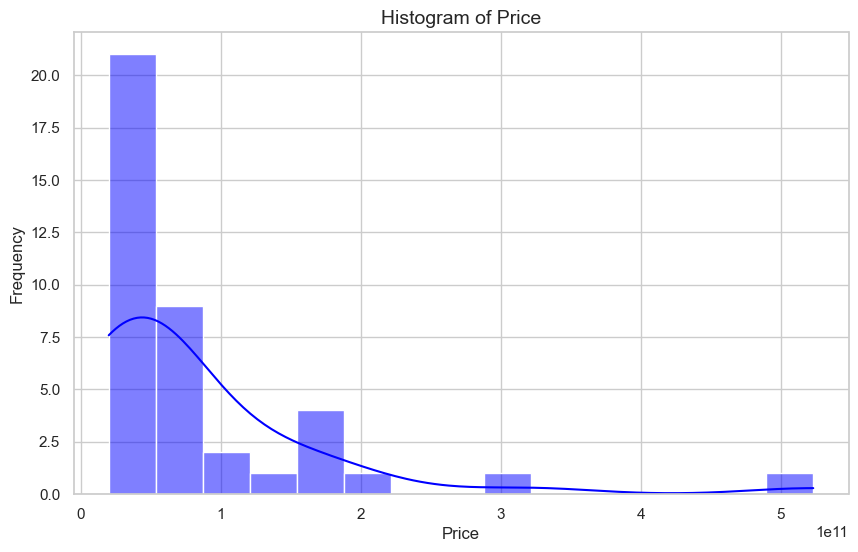

In [152]:
plt.figure(figsize=(10, 6))
sns.histplot(data["Price"], bins=15, kde=True, color="blue")
plt.title("Histogram of Price", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()


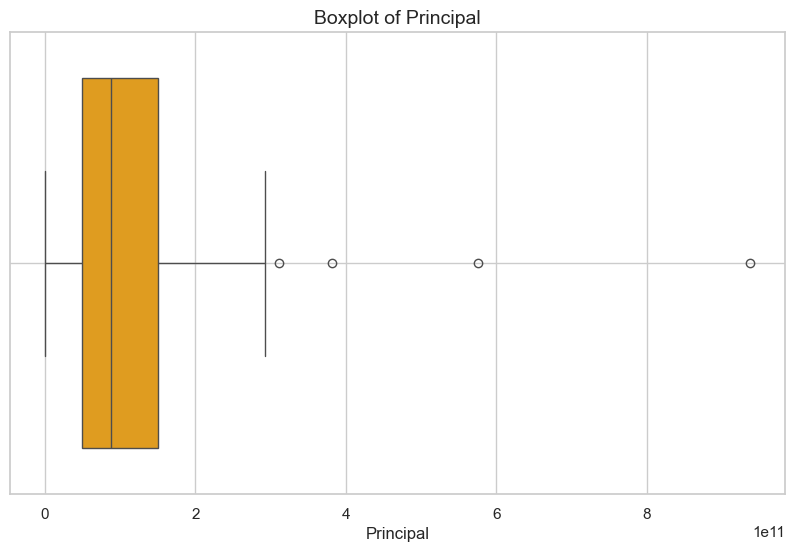

In [153]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data["Principal"], color="orange")
plt.title("Boxplot of Principal", fontsize=14)
plt.xlabel("Principal", fontsize=12)
plt.grid(True)
plt.show()


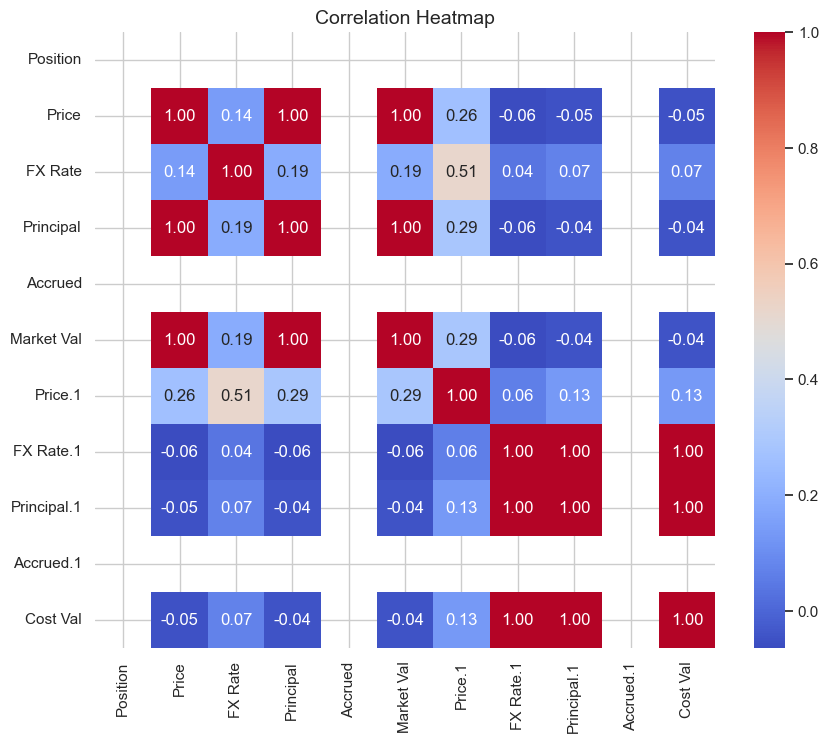

In [154]:
# Define numerical_columns
numerical_columns = data.select_dtypes(include=['number']).columns

if len(numerical_columns) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(data[numerical_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap", fontsize=14)
    plt.show()


In [155]:
summary = data[numerical_columns].describe()
print("\nSummary Statistics:")
print(summary)


Summary Statistics:
       Position         Price    FX Rate     Principal  Accrued    Market Val  \
count      40.0  4.000000e+01  40.000000  4.000000e+01      0.0  4.000000e+01   
mean        1.0  8.256303e+10   1.708237  1.458955e+11      NaN  1.458955e+11   
std         0.0  9.580438e+10   0.369667  1.731618e+11      NaN  1.731618e+11   
min         1.0  2.008944e+10   0.011570  2.645444e+08      NaN  2.645444e+08   
25%         1.0  2.760252e+10   1.791790  4.945802e+10      NaN  4.945802e+10   
50%         1.0  4.919277e+10   1.791790  8.814329e+10      NaN  8.814329e+10   
75%         1.0  8.418453e+10   1.791790  1.507500e+11      NaN  1.507500e+11   
max         1.0  5.230000e+11   1.791790  9.370000e+11      NaN  9.370000e+11   

         Price.1  FX Rate.1  Principal.1  Accrued.1    Cost Val  
count  40.000000  40.000000    40.000000        0.0   40.000000  
mean   12.007500   2.969750    36.265000        NaN   36.265000  
std     1.854754   5.197165    63.455775        NaN

In [156]:
# from scipy.stats import skew, kurtosis

# metrics = {
#     "Metric": ["Mean", "Median", "Standard Deviation", "Skewness", "Kurtosis"],
#     "Price": [
#         data["Price"].mean(),
#         data["Price"].median(),
#         data["Price"].std(),
#         skew(data["Price"], nan_policy="omit"),
#         kurtosis(data["Price"], nan_policy="omit"),
#     ],
#     "Principal": [
#         data["Principal"].mean(),
#         data["Principal"].median(),
#         data["Principal"].std(),
#         skew(data["Principal"], nan_policy="omit"),
#         kurtosis(data["Principal"], nan_policy="omit"),
#     ],
# }

# summary_table = pd.DataFrame(metrics)
# print("Additional Metrics:")
# print(summary_table)
# print("/////////////////////////////////////////////////")
# top_holdings = data.sort_values(by="Principal", ascending=False).head(5)
# print("Top Holdings by Principal:")
# print(top_holdings[["Security", "Principal", "Market Val"]])
# print("////////////////////////////////////////")
# confidence_level = 0.05
# VaR = data["Price"].quantile(confidence_level)
# print(f"Value at Risk (5%): {VaR}")
# print("////////////////////////////////////////")
# allocation = data.groupby("Security")["Principal"].sum() / data["Principal"].sum() * 100
# print("Allocation by Security:")
# print(allocation)

from scipy.stats import skew, kurtosis

# Display the metrics in a tabular format

metrics_table = pd.DataFrame(metrics)
# Define the metrics dictionary
metrics = {
    "Metric": ["Mean", "Median", "Standard Deviation", "Skewness", "Kurtosis"],
    "Price (in Millions)": [
        data["Price"].mean() / 1e6,
        data["Price"].median() / 1e6,
        data["Price"].std() / 1e6,
        skew(data["Price"], nan_policy="omit"),
        kurtosis(data["Price"], nan_policy="omit"),
    ],
    "Principal (in Millions)": [
        data["Principal"].mean() / 1e6,
        data["Principal"].median() / 1e6,
        data["Principal"].std() / 1e6,
        skew(data["Principal"], nan_policy="omit"),
        kurtosis(data["Principal"], nan_policy="omit"),
    ],
}

# Create the DataFrame from metrics
metrics_table = pd.DataFrame(metrics)

# Print the table
print(metrics_table)


               Metric  Price (in Millions)  Principal (in Millions)
0                Mean         82563.031184            145895.493858
1              Median         49192.768391             88143.286822
2  Standard Deviation         95804.378797            173161.794566
3            Skewness             2.963756                 2.905046
4            Kurtosis             9.957184                 9.671881


In [157]:
top_holdings_in_millions = data.sort_values(by="Principal", ascending=False).head(5)
top_holdings_in_millions["Principal_in_millions"] = top_holdings_in_millions["Principal"] / 1e6
top_holdings_in_millions["Market_Val_in_millions"] = top_holdings_in_millions["Market Val"] / 1e6

print("Top Holdings (in Millions):")
print(top_holdings_in_millions[["Security", "Principal_in_millions", "Market_Val_in_millions"]])


Top Holdings (in Millions):
    Security  Principal_in_millions  Market_Val_in_millions
39    XOM US               937000.0                937000.0
3     BAC US               576000.0                576000.0
38    WFC US               382000.0                382000.0
37     VZ US               311000.0                311000.0
6   CMCSA US               292000.0                292000.0
